## Выбор предварительно обученной модели

Первым шагом необходимо определиться с моделью и типом задачи. Согласно заданию, обучать модель с нуля не требуется. В данном случае, я выбираю вариант генерации изображений по текстовому описанию. Это популярная задача, решаемая диффузионными моделями, такими как `Stable Diffusion` или её аналоги.

`Stable Diffusion`– модель диффузии, способная порождать реалистичные изображения по тексту. Она была разработана в 2022 году (CompVis/Stability AI) и доступна в открытом виде. Достоинство – множество готовых весов в Hugging Face, поддержка различных версий (1.4, 1.5, 2.1).

**Для наглядности планирую использовать Stable Diffusion v1-4**

## Демонстрация модели в Google Colab (Первый этап)

**Установка зависимостей**: Для Stable Diffusion потребуется пакет `Diffusers` (библиотека от Hugging Face), а также вспомогательные – `Transformers`, `SciPy`, `ftfy`, `Accelerate`.

In [1]:
# !pip install diffusers transformers scipy ftfy accelerate

In [2]:
# !pip install -q --upgrade diffusers huggingface_hub accelerate transformers safetensors

**Загрузка предобученной модели**

In [ ]:
from diffusers import StableDiffusionPipeline
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4")
pipe.to("cuda")  # переносим модель в GPU

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

merges.txt: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.35.2",
  "_name_or_path": "CompVis/stable-diffusion-v1-4",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

**Генерация тестового изображения**: Теперь можно сгенерировать изображение по произвольному текстовому описанию. Задаём текстовый prompt. Например:
`фотография астронавта верхом на лошади`

  0%|          | 0/50 [00:00<?, ?it/s]

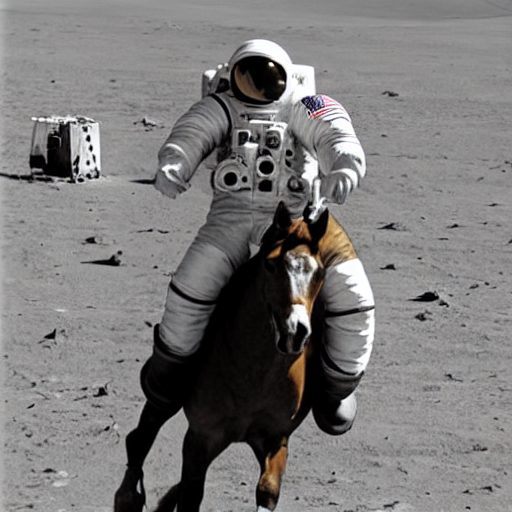

In [ ]:
prompt = "a photograph of an astronaut riding a horse"
image = pipe(prompt).images[0]
image.save("astronaut_rides_horse.png")
image

bКаждый запуск с новым случайным сидом даст другое изображение, поскольку диффузионная генерация стохастична.

## Размещение кода на GitHub (Второй этап)